In [10]:
import numpy as np
from scipy import linalg
import matplotlib.pyplot as plt

### D(f) = [1,15]

In [11]:
def f(x):
    return np.sin(x / 5) * np.exp(x / 10) + 5 * np.exp(-x / 2)

In [12]:
def get_weights(func,degree,points):
    data = np.ones((len(points),degree+1))
    for deg in range(0,degree+1):
        for ind,point in enumerate(points):
            data[ind][deg] = point**deg
    label = np.array([func(x) for x in points])
    label = label.reshape(len(label),1)
    return linalg.solve(data,label)

In [13]:
def create_func(weights):
    def func(x):
        out = 0 
        for deg,w in enumerate(weights):
            out += w[0] * x**deg
        return out
    return func

In [14]:
def create_plot(func,func1,points):
    x_data = points
    y_data = []
    y1_data = []
    for point in x_data:
        y_data.append(func(point))
        y1_data.append(func1(point))
        
    plt.plot(x_data, y_data, color = '#539caf')
    plt.plot(x_data, y1_data)
    plt.show()

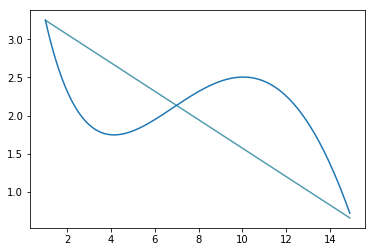

In [15]:
x_1 = get_weights(f,1,[1,15])
func_1 = create_func(x_1)
create_plot(func_1,f,np.arange(1.,15.,0.1))

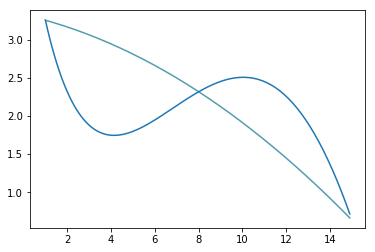

In [16]:
x_2 = get_weights(f,2,[1,8,15])
func_2 = create_func(x_2)
create_plot(func_2,f,np.arange(1.,15.,0.1))

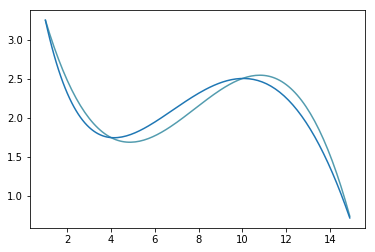

In [17]:
x_3 = get_weights(f,3,[1,4,10,15])
func_3 = create_func(x_3)
create_plot(func_3,f,np.arange(1.,15.,0.1))

In [18]:
with open('submission-2.txt','w') as f_w:
    sent = str(x_3[0][0]) + ' ' + str(x_3[1][0])+\
    ' ' + str(x_3[2][0]) + ' ' + str(x_3[3][0])
    f_w.write(sent)